In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [174]:
heatcap = 1.3               #Joule/gramm/kelvin
density = 2.75              #gramm/cm^3
heatcond = .052*900         #J/cm/15min/Kelvin

laval_width = 500           #note it is centimeters
distance_dike = 2500        #note it is centimeters



dike = np.zeros(250)
for i in range(250):
    if i>100 and i<150:
        dike[i] = 1230
    else:
        dike[i] = 20


def create_dike_grid(size, more_rock):       #Create a grid for our dike with (size) intervals
    obj = np.zeros(size)
    for i in range(size):
        where_lava = more_rock
        uptown_rock = more_rock*2
        if i>size*where_lava//(uptown_rock+1) and i<size*(where_lava+1)//(uptown_rock+1):
            obj[i] = 1230
        else:
            obj[i] = 20
    return obj


def oneDcooling(temp, size):   #Preform cooling for 1 timestep
    new_temp = temp.copy()
    
    delta_x_squared = (distance_dike/size)**2     #need to take the len of our system in cm and divide by the number intervals to get delta x
    kappa = heatcap
    cp = heatcond
    rho = density
    k = (heatcap/(heatcond*density))
    delta_t = int(.090909091*delta_x_squared/(k))
    for i in range(len(temp)):
        if i-1 <= 0:
            past_x = 20
        else:
            past_x = temp[i-1]
        if i+1 >= len(temp):
            next_x = 20
        else:
            next_x = temp[i+1]
        current_x = temp[i]
        new_temp[i] = (delta_t/delta_x_squared)*(kappa/(cp*rho))*(next_x - 2*current_x + past_x) + current_x
    return new_temp


def plot1dthing(data, len_time):       #plot these 1 d cooling and show where the temp is at 
    plt.plot(np.linspace(0, 25, len(data)), data)
    plt.xlabel('location along dike(m)')
    plt.ylabel('heat')
    plt.title(f'Heat Based on Location after {len_time}')
    plt.plot(np.ones(50)*12.5, np.linspace(0, data[len(data)//2] + data[len(data)//2]/50))
    plt.plot(np.linspace(0, 25), np.ones(50)*data[len(data)//2], label = f'max={data[len(data)//2]}')
    plt.legend()
    plt.show()


time_intervals = [4, 4*24, 4*24*7, 4*24*31, 4*24*365]
times = ['1hour', '1day', '1week', '1month', '1year']

def complete_table(size, more_rock):
    max = []
    energy = []
    for j, time in enumerate(time_intervals):
        current_temp = create_dike_grid(size, more_rock)
        #delta_x = size/250
        for i in range(time):
            new_temp = oneDcooling(current_temp, size = size)
            current_temp = new_temp
        max.append(current_temp[size//2])
        total_energy4 = np.sum(current_temp)*.1
        energy.append(total_energy4)
    plot1dthing(current_temp, times[j])
    print(f'the max values at [1hr, 1day, 1week, 1month and 1year] are:{max} respectively')
    return energy

In [66]:
squigglyN = (900/100)*(heatcap/(heatcond*density))

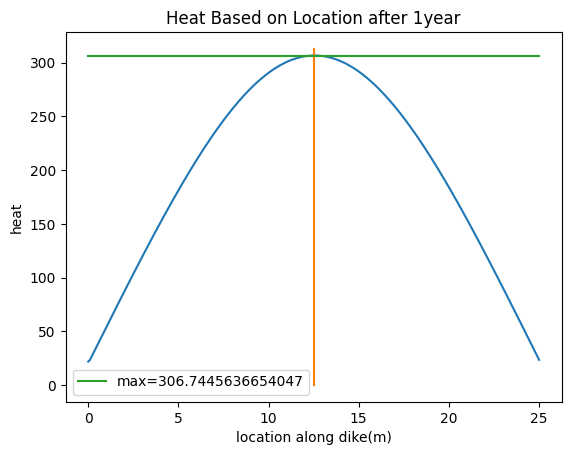

the max values at [1hr, 1day, 1week, 1month and 1year] are:[1230.0, 1229.999987319504, 1197.7504751793404, 876.4889845478863, 306.7445636654047] respectively


In [166]:
#dike = create_dike_grid(250)
complete_table(250, more_rock=2)

What unit of length do you use in your code? 
    I use centimeters for length since the density and heat conductivity also take cm

What unit of time do you use? 
    one unit of time is 15 minutes

What is the coefficient k (see lecture 11)? Specify value and units: 
    The heat capacity is 1.3 joule/gram/kelvin

What is you grid spacing dx? 
    .1 meters

What is your time step dt? 
15 minutes


Work out the coefficient eta (see lecture 11)?
    squigglyN = .0909091

#2

When Using 1750 intervalswe see the temperature change below after 1 year and the other timesteps are listed in the array below


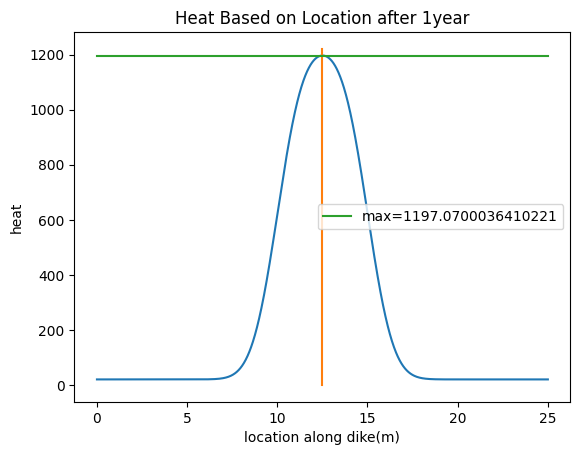

the max values at [1hr, 1day, 1week, 1month and 1year] are:[1230.0, 1230.0, 1230.0, 1229.999999999944, 1197.0700036410221] respectively
---------------------------------------------------------------------------------------------
When Using 2000 intervalswe see the temperature change below after 1 year and the other timesteps are listed in the array below


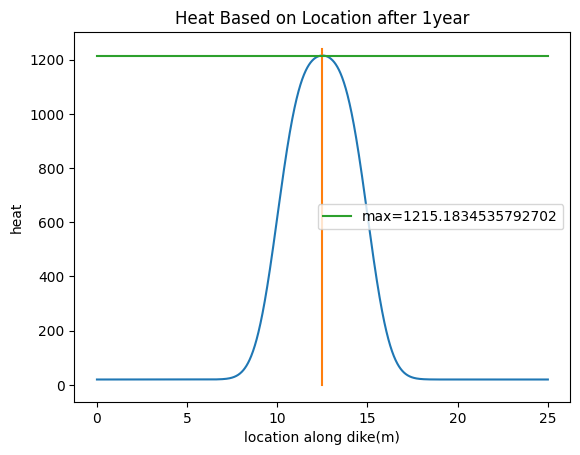

the max values at [1hr, 1day, 1week, 1month and 1year] are:[1230.0, 1230.0, 1230.0, 1230.0, 1215.1834535792702] respectively
---------------------------------------------------------------------------------------------
When Using 2250 intervalswe see the temperature change below after 1 year and the other timesteps are listed in the array below


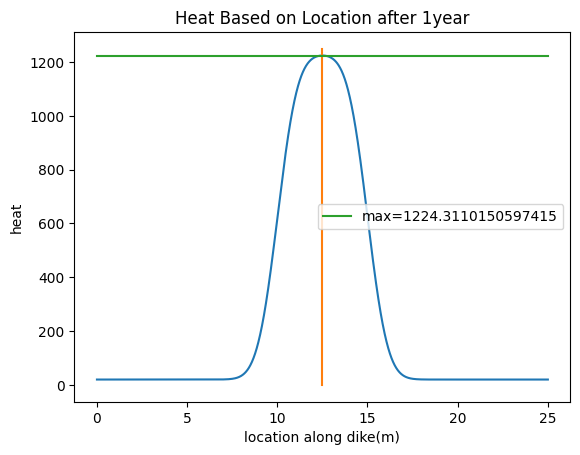

the max values at [1hr, 1day, 1week, 1month and 1year] are:[1230.0, 1230.0, 1230.0, 1230.0, 1224.3110150597415] respectively
---------------------------------------------------------------------------------------------
When Using 2350 intervalswe see the temperature change below after 1 year and the other timesteps are listed in the array below


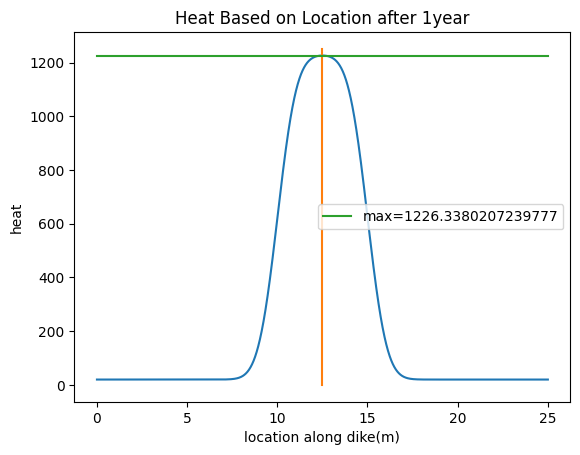

the max values at [1hr, 1day, 1week, 1month and 1year] are:[1230.0, 1230.0, 1230.0, 1230.0, 1226.3380207239777] respectively
---------------------------------------------------------------------------------------------


In [181]:
N = [350, 400, 450, 470]


for num_ints in N:
    print(f'When Using {num_ints*5} intervalswe see the temperature change below after 1 year and the other timesteps are listed in the array below')
    complete_table(num_ints*5, more_rock=2)

    print('---------------------------------------------------------------------------------------------')


To obtain the converged results, I needed to use around 2850 intervals
I beleive that a double in the number of intervals will result doubling the runtime! This is slow

For Number 3

This is for rock of thickness 12xd


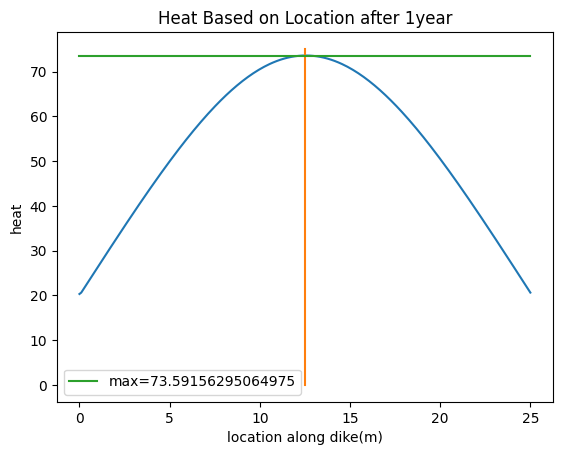

the max values at [1hr, 1day, 1week, 1month and 1year] are:[1230.0, 892.0415589294618, 402.7293460374283, 205.6428712253837, 73.59156295064975] respectively
This is for rock of thickness 14xd


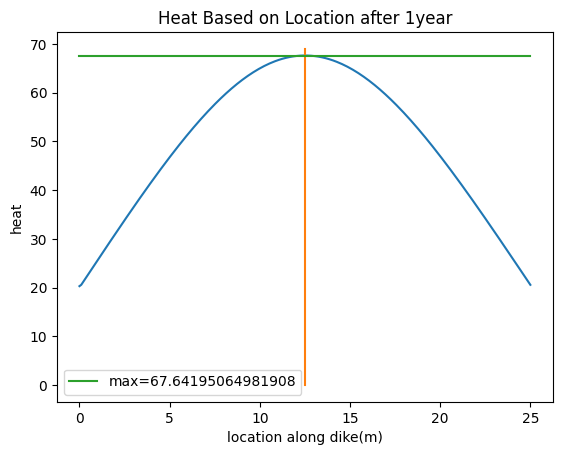

the max values at [1hr, 1day, 1week, 1month and 1year] are:[1229.9173553719008, 819.1208933198611, 361.81204775424277, 185.1933916327663, 67.64195064981908] respectively
This is for rock of thickness 16xd


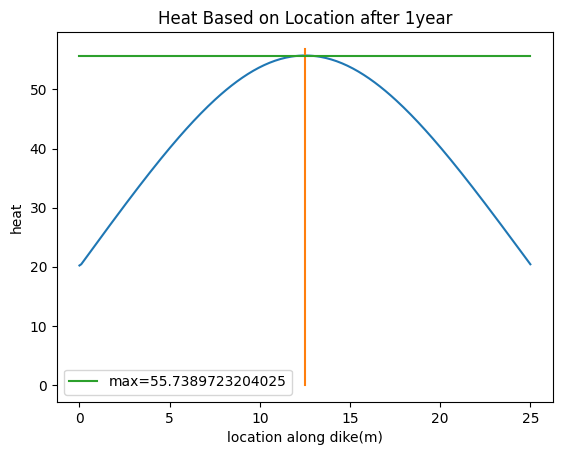

the max values at [1hr, 1day, 1week, 1month and 1year] are:[1226.8595041322312, 656.9042393563377, 278.78620717482914, 144.161672424845, 55.7389723204025] respectively
This is for rock of thickness 18xd


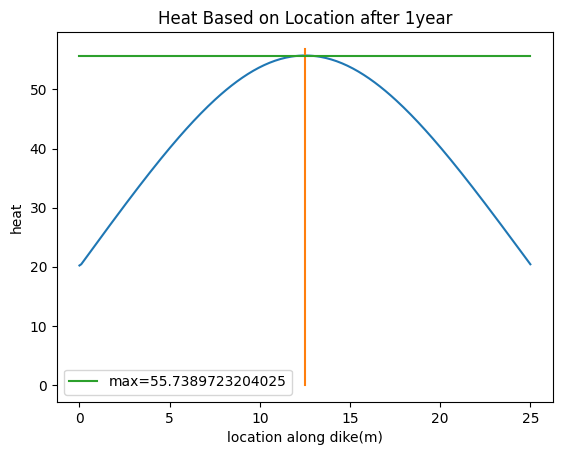

the max values at [1hr, 1day, 1week, 1month and 1year] are:[1226.8595041322312, 656.9042393563377, 278.78620717482914, 144.161672424845, 55.7389723204025] respectively
This is for rock of thickness 20xd


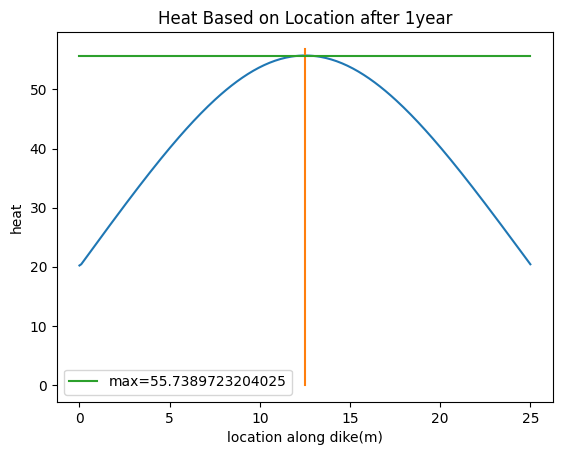

the max values at [1hr, 1day, 1week, 1month and 1year] are:[1226.8595041322312, 656.9042393563377, 278.78620717482914, 144.161672424845, 55.7389723204025] respectively
This is for rock of thickness 22xd


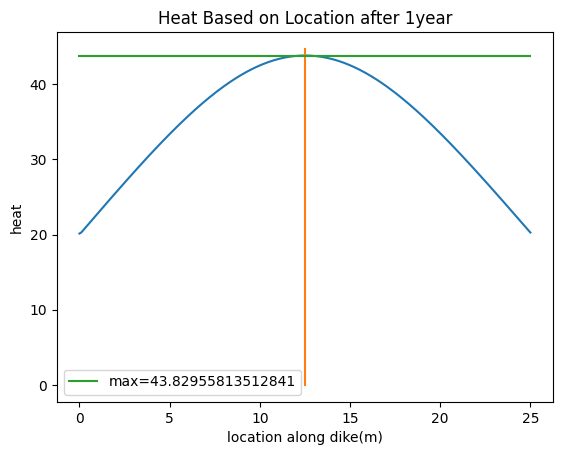

the max values at [1hr, 1day, 1week, 1month and 1year] are:[1183.3884297520663, 464.3842271033099, 193.6970316227337, 102.90183709480901, 43.82955813512841] respectively


In [172]:
num_iters = 250

for level_rock in [ 12, 14, 16, 18, 20, 22]:    
    print(f'This is for rock of thickness {level_rock}xd')
    complete_table(num_iters, more_rock=level_rock)




The convergence occurs between 18 and 20 times more rock than lava

Heat Loss #4

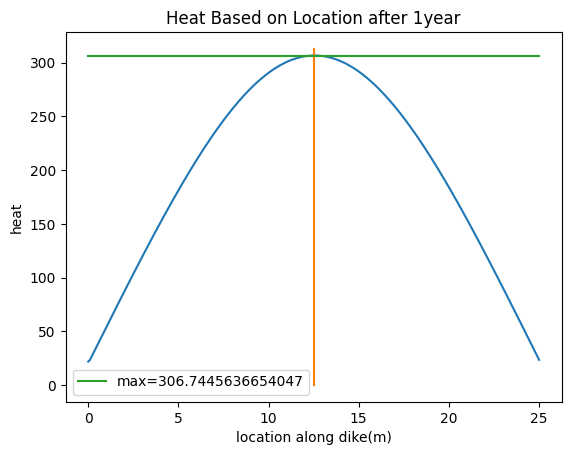

the max values at [1hr, 1day, 1week, 1month and 1year] are:[1230.0, 1229.999987319504, 1197.7504751793404, 876.4889845478863, 306.7445636654047] respectively
[6429.0, 6429.0, 6429.000000000004, 6428.9813677258735, 4969.765031295941]
The energy lost  [1 hr to 1 day]:0.0, [1 day to 1 week]: -3.637978807091713e-12, [1 week to 1 month]: 0.018632274130141013, [1 month to 1 year]: 1459.2163364299322


In [184]:
energy = complete_table(size=num_iters, more_rock=2)

print(energy)
print(f'The energy lost  [1 hr to 1 day]:{energy[0]- energy[1]}, [1 day to 1 week]: {energy[1] - energy[2]}, [1 week to 1 month]: {energy[2] - energy[3]}, [1 month to 1 year]: {energy[3] - energy[4]}')